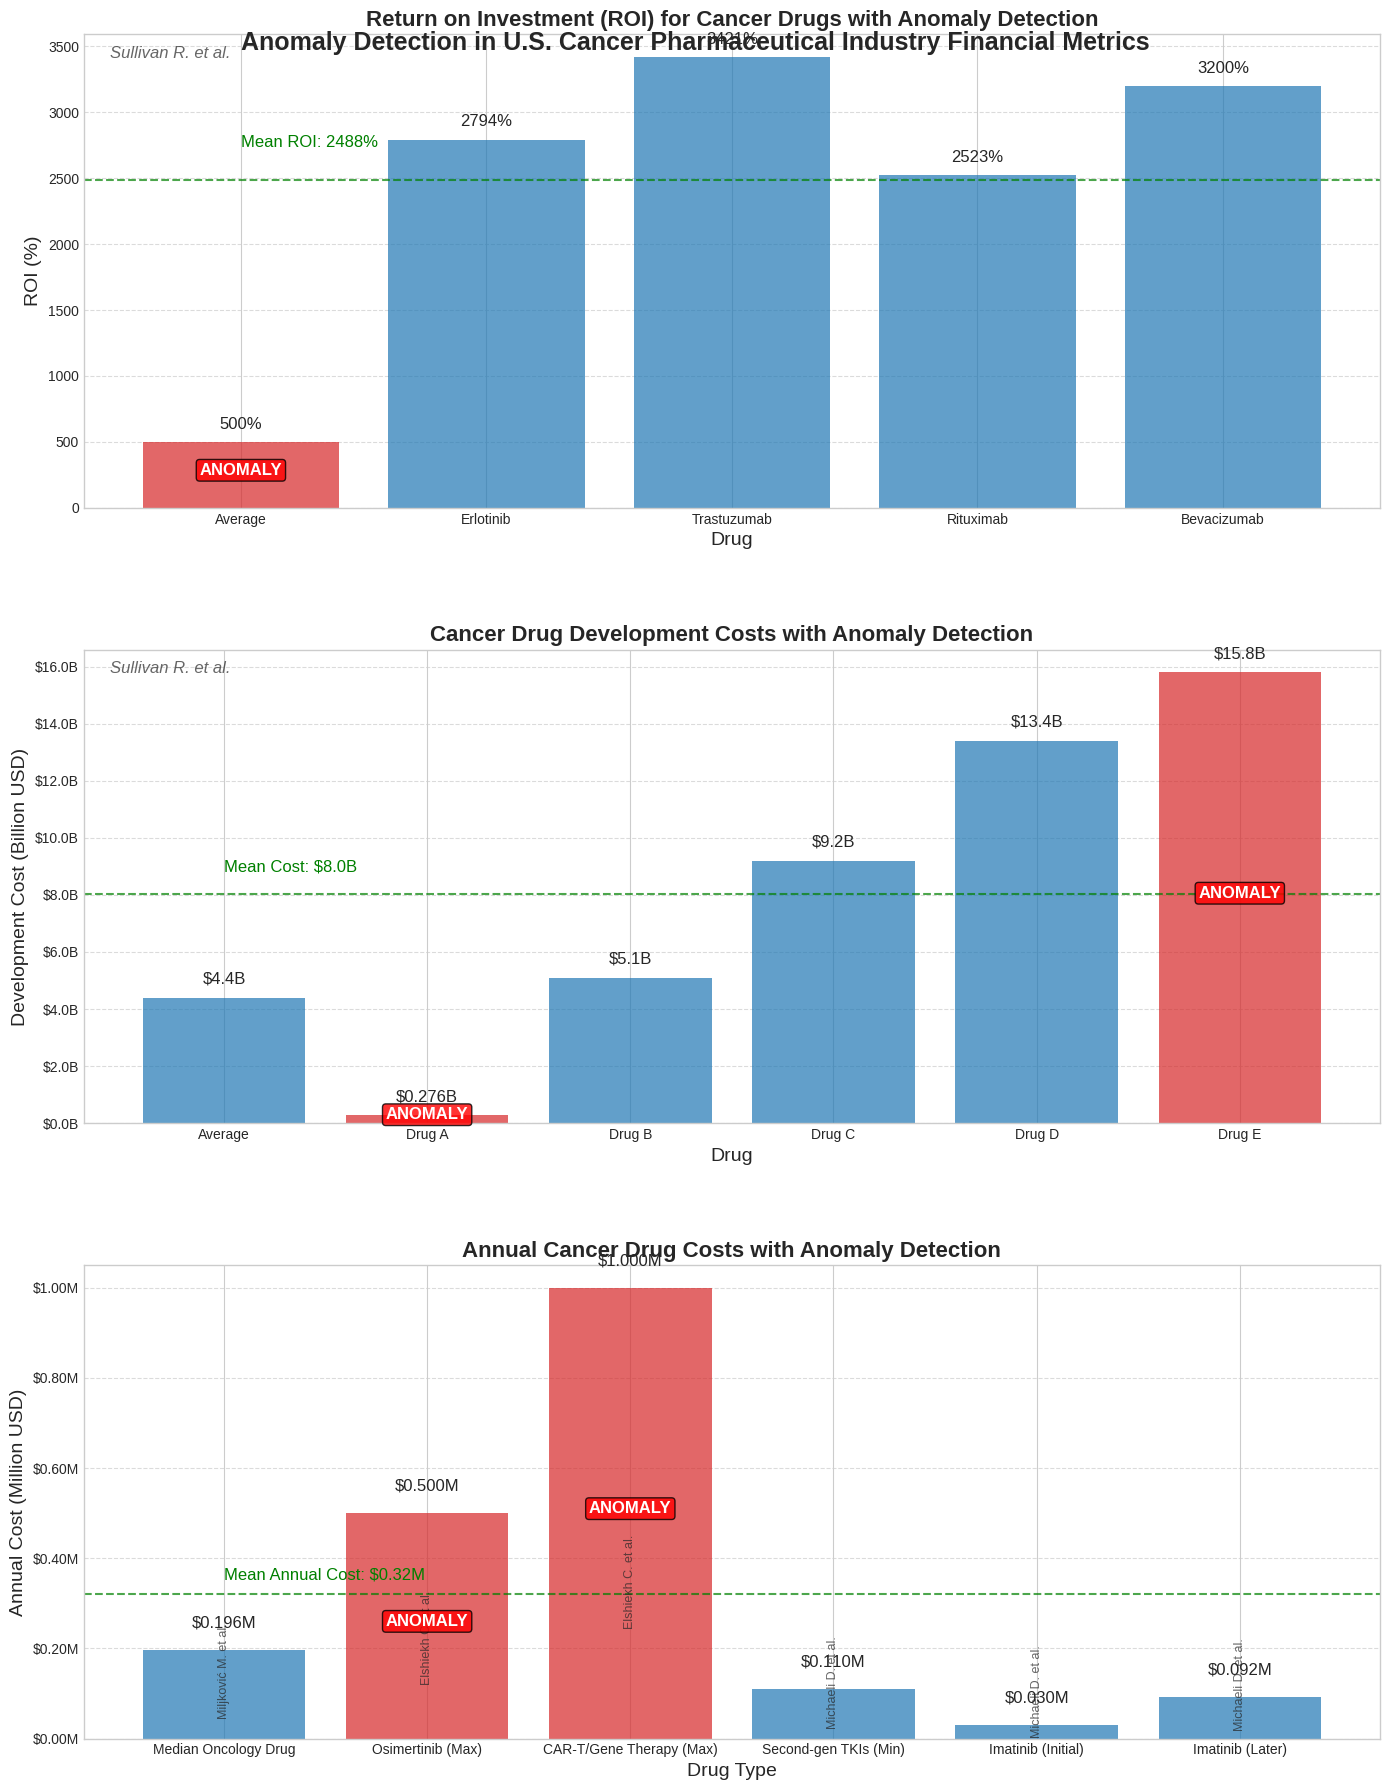

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
from sklearn.ensemble import IsolationForest

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

# 1. ROI Data from Sullivan R. et al.
drug_names = ['Average', 'Erlotinib', 'Trastuzumab', 'Rituximab', 'Bevacizumab']
roi_values = [500, 2794, 3421, 2523, 3200]  # Percentage ROI - Sullivan R. et al.

# 2. Drug Development Costs with failures included - Sullivan R. et al.
drugs = ['Average', 'Drug A', 'Drug B', 'Drug C', 'Drug D', 'Drug E']
development_costs = [4.4, 0.276, 5.1, 9.2, 13.4, 15.8]  # Billions USD - Sullivan R. et al.

# 3. Annual costs for different oncology drugs - from various citations
drug_types = ['Median Oncology Drug', 'Osimertinib (Max)', 'CAR-T/Gene Therapy (Max)',
              'Second-gen TKIs (Min)', 'Imatinib (Initial)', 'Imatinib (Later)']
annual_costs = [0.196, 0.5, 1.0, 0.11, 0.03, 0.092]  # Million USD
# Sources for each data point
sources = ['Miljković M. et al.', 'Elshiekh C. et al.', 'Elshiekh C. et al.',
           'Michaeli D. et al.', 'Michaeli D. et al.', 'Michaeli D. et al.']

# Function to detect anomalies using Isolation Forest
def detect_anomalies(data, contamination=0.25):
    clf = IsolationForest(contamination=contamination, random_state=42)
    data_array = np.array(data).reshape(-1, 1)
    preds = clf.fit_predict(data_array)
    return [i for i, pred in enumerate(preds) if pred == -1]  # Return indices of anomalies

# Format for displaying dollar values in billions
def billions_formatter(x, pos):
    return f'${x:.1f}B'

# Format for displaying dollar values in millions
def millions_formatter(x, pos):
    return f'${x:.2f}M'

# Create the plots
fig, axs = plt.subplots(3, 1, figsize=(14, 18))

# Plot 1: ROI Anomalies
roi_anomalies = detect_anomalies(roi_values)
colors = ['#1f77b4' if i not in roi_anomalies else '#d62728' for i in range(len(roi_values))]
bars = axs[0].bar(drug_names, roi_values, color=colors, alpha=0.7)
axs[0].set_title('Return on Investment (ROI) for Cancer Drugs with Anomaly Detection', fontsize=16, fontweight='bold')
axs[0].set_xlabel('Drug', fontsize=14)
axs[0].set_ylabel('ROI (%)', fontsize=14)
axs[0].grid(True, linestyle='--', alpha=0.7, axis='y')

# Add a horizontal line for the mean
mean_roi = np.mean(roi_values)
axs[0].axhline(y=mean_roi, color='green', linestyle='--', alpha=0.7)
axs[0].text(0, mean_roi*1.1, f'Mean ROI: {mean_roi:.0f}%', fontsize=12, color='green')

# Annotate the bars with values
for i, v in enumerate(roi_values):
    axs[0].text(i, v + 100, f'{v}%', ha='center', fontsize=12)

# Highlight anomalies with text
for i in roi_anomalies:
    axs[0].text(i, roi_values[i]/2, "ANOMALY", ha='center',
               color='white', fontweight='bold', fontsize=12,
               bbox=dict(boxstyle='round,pad=0.2', facecolor='red', alpha=0.8))

axs[0].text(0.02, 0.95, 'Sullivan R. et al.', transform=axs[0].transAxes,
           fontsize=12, style='italic', alpha=0.7)

# Plot 2: Development Cost Anomalies
cost_anomalies = detect_anomalies(development_costs)
colors = ['#1f77b4' if i not in cost_anomalies else '#d62728' for i in range(len(development_costs))]
axs[1].bar(drugs, development_costs, color=colors, alpha=0.7)
axs[1].set_title('Cancer Drug Development Costs with Anomaly Detection', fontsize=16, fontweight='bold')
axs[1].set_xlabel('Drug', fontsize=14)
axs[1].set_ylabel('Development Cost (Billion USD)', fontsize=14)
axs[1].yaxis.set_major_formatter(FuncFormatter(billions_formatter))
axs[1].grid(True, linestyle='--', alpha=0.7, axis='y')

# Add a horizontal line for the mean
mean_cost = np.mean(development_costs)
axs[1].axhline(y=mean_cost, color='green', linestyle='--', alpha=0.7)
axs[1].text(0, mean_cost*1.1, f'Mean Cost: ${mean_cost:.1f}B', fontsize=12, color='green')

# Annotate the bars with values
for i, v in enumerate(development_costs):
    axs[1].text(i, v + 0.5, f'${v}B', ha='center', fontsize=12)

# Highlight anomalies with text
for i in cost_anomalies:
    axs[1].text(i, development_costs[i]/2, "ANOMALY", ha='center',
               color='white', fontweight='bold', fontsize=12,
               bbox=dict(boxstyle='round,pad=0.2', facecolor='red', alpha=0.8))

axs[1].text(0.02, 0.95, 'Sullivan R. et al.', transform=axs[1].transAxes,
           fontsize=12, style='italic', alpha=0.7)

# Plot 3: Annual Drug Cost Anomalies
annual_cost_anomalies = detect_anomalies(annual_costs)
colors = ['#1f77b4' if i not in annual_cost_anomalies else '#d62728' for i in range(len(annual_costs))]
axs[2].bar(drug_types, annual_costs, color=colors, alpha=0.7)
axs[2].set_title('Annual Cancer Drug Costs with Anomaly Detection', fontsize=16, fontweight='bold')
axs[2].set_xlabel('Drug Type', fontsize=14)
axs[2].set_ylabel('Annual Cost (Million USD)', fontsize=14)
axs[2].yaxis.set_major_formatter(FuncFormatter(millions_formatter))
axs[2].grid(True, linestyle='--', alpha=0.7, axis='y')

# Add a horizontal line for the mean
mean_annual = np.mean(annual_costs)
axs[2].axhline(y=mean_annual, color='green', linestyle='--', alpha=0.7)
axs[2].text(0, mean_annual*1.1, f'Mean Annual Cost: ${mean_annual:.2f}M', fontsize=12, color='green')

# Annotate the bars with values and sources
for i, (v, source) in enumerate(zip(annual_costs, sources)):
    axs[2].text(i, v + 0.05, f'${v:.3f}M', ha='center', fontsize=12)
    axs[2].text(i, v/4, source, ha='center', fontsize=9, rotation=90, alpha=0.7)

# Highlight anomalies with text
for i in annual_cost_anomalies:
    axs[2].text(i, annual_costs[i]/2, "ANOMALY", ha='center',
               color='white', fontweight='bold', fontsize=12,
               bbox=dict(boxstyle='round,pad=0.2', facecolor='red', alpha=0.8))

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.suptitle('Anomaly Detection in U.S. Cancer Pharmaceutical Industry Financial Metrics',
             fontsize=18, fontweight='bold', y=0.98)
plt.savefig('cancer_pharma_financial_anomalies.png', dpi=300, bbox_inches='tight')
plt.show()